# Задание 6

Найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

### Импорт библиотек

In [33]:
import numpy as np
import pandas as pd

### Загрузка данных

In [34]:
dfData = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
dfData.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


### Вывод баланса

In [35]:
dfData['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

### Вывод пропусков

In [36]:
dfData.balance_due[dfData['balance_due'].isna() == True]

Series([], Name: balance_due, dtype: float64)

### Замена пропусков

In [37]:
dfData['balance_due'] = dfData['balance_due'].fillna(dfData['balance_due'].value_counts()[:1].index[0])
dfData['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

### Импорт библиотеки `seaborn`

In [38]:
import seaborn as sns

### График выбросов

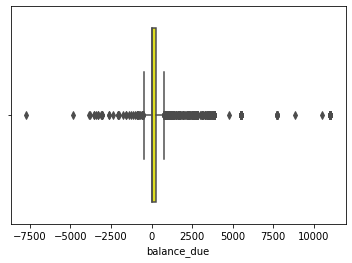

In [39]:
sns.boxplot(dfData['balance_due'], color='yellow');

### Функция определения выбросов

In [40]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

### Определение выбросов

In [41]:
aOutliers = outliers_iqr(dfData['balance_due'])
aOutliers

array([     6,      9,     12, ..., 250259, 250274, 250287], dtype=int64)

### Вычисление максимального и минимального значений

In [42]:
fMax = aOutliers.max()
fMin = aOutliers.min()

print('Максимальное значение: ', fMax)
print('Минимальное значение: ', fMin)

Максимальное значение:  250287
Минимальное значение:  6


### Импорт библиотеки `math`

In [43]:
import math 

### Модуль разницы этих значений

In [44]:
math.fabs(fMax - fMin)

250281.0